In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere


# print(t_max, dt, tau, el, vr, vth, r, i_mean)

Compute the values of V(t) between t=0 and t=0.01 with step Δt=0.001 and V(0)=EL.

We need to reorganize the Eq. (1) to isolate V(t+Δt) on the left side, and express it as function of V(t) and the other terms:

(4)
V(t+Δt)=V(t)+Δtτm(El−V(t)+RI(t))

**New coding concepts**: - We use a **for loop** in the code below. We will dive deeper into for loops later, but essentially for loops allow us to run the same code block multiple times. In this case, we loop over steps so the variable *step* equals something new each time. We use the syntax `for step in range(10):`. This means that `step` will take each integer value between 0 and 10. - You can use `np.pi` as the value of $\pi$ and `np.sin(x)` to get the sine of x. These come from a package called numpy, which we'll learn about later.

In [4]:
import numpy as np

step_end = 10
v = el

for step in range(step_end):
    t = step * dt
    
    i  = i_mean * (1 + np.sin((t *2* np.pi)/ 0.01))
    
    v = v + dt/tau * (el - v + r*i)
    
    print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


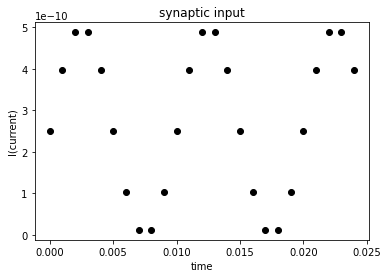

In [5]:
import matplotlib.pyplot as plt

step_end = 25

plt.figure()
plt.title('synaptic input')
plt.xlabel('time')
plt.ylabel('I(current)')

for step in range(step_end):
    t = step * dt
    i = i_mean *(1 + np.sin((t * 2* np.pi)/0.01))
    v = v + dt/tau * (el - v + r*i)
    plt.plot(t, i, 'ko')

plt.show()

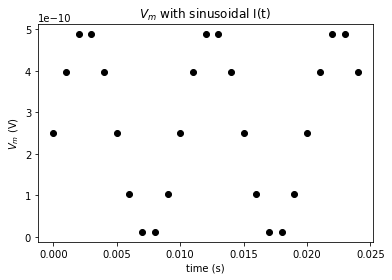

In [6]:
import matplotlib.pyplot as plt

step_end = 25

plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

for step in range(step_end):
    t = step * dt
    i = i_mean *(1 + np.sin((t * 2* np.pi)/0.01))
    #v = v + dt/tau * (el - v + r*i)
    plt.plot(t, i, 'ko')

plt.show()

example:

Plot the values of V(t) between t=0 and t=tmax. We can compute the number of steps required to get to t=tmax given Δt as int(t_max/dt) where int gets the nearest integer.

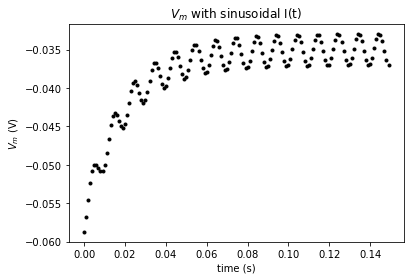

In [7]:
step_end = int(t_max/dt)

v = el

plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
    v = v + dt/tau * (el - v + r*i) 
    
    plt.plot(t, v, 'k.')
plt.show()

Random synaptic input:

From the perspective of neurons, synaptic input is random (or stochastic). We’ll improve the synaptic input model by introducing random input current with statistical properties similar to the previous exercise:

(5)
I(t)=Imean(1+0.1tmaxΔt−−−−√ξ(t))with ξ(t)∼U(−1,1)
where U(−1,1) is the uniform distribution with support x∈[−1,1].

We can approximate randomness in code using a pseudo random number generator. The function np.random.seed() initializes the RNG. If we initialize this with a number (e.x. np.random.seed(2)), we will get the same random number draws each time we run the code. Basically, we are making the random number generation replicable. We do this here so you can get a figure that exactly matches the solution. The function np.random.random() generates samples from the uniform distribution between 0 and 1.

Plot the values of V(t) between t=0 and t=tmax−Δt with random input I(t).

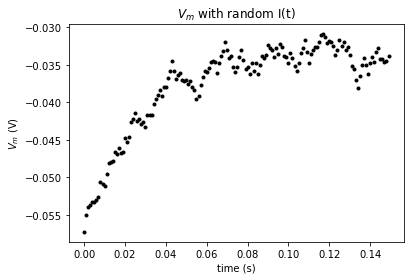

In [8]:
#adding randomness

np.random.seed(2020)

step_end = int(t_max / dt)
v =el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # # ξ(t)∼U(−1,1) Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = 2 * np.random.random() - 1

  # Compute value of i at this time step
  i = i_mean *(1 + 0.1 *(t_max/dt)**(0.5) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

Multiple runs of the previous exercise may give the impression of periodic regularity in the evolution of V(t). We’ll collect the sample mean over N=50 realizations of V(t) with random input to test such a hypothesis. The sample mean, sample variance and sample autocovariance at times {t,s}∈[0,tmax], and for N realizations Vn(t) are given by:

Coding Exercise: Storing simulations in lists

Plot multiple simulations (N=50) of V(t) by storing in a list the voltage of each neuron at time t.

Keep in mind that the plotting command plt.plot(x, y) requires x to have the same number of elements as y.

Mathematical symbols such as α and β are specified as $\alpha$ and $\beta$ in TeX markup. See additional details in
https://matplotlib.org/3.2.2/tutorials/text/mathtext.html in Matplotlib.

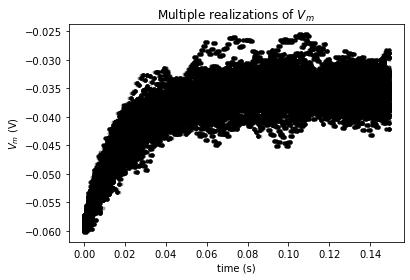

In [9]:
np.random.seed(2020)

step_end = int(t_max/dt)
n = 50

v_n = [el] * n

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    
    t = step * dt

    for j in range(0, n):
 
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
    
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

     # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
      plt.plot([t] * n, v_n, 'k.', alpha=0.1)

plt.show()

Coding Exercise 9: Plotting sample mean

Add the sample mean ⟨V(t)⟩=1N∑Nn=1Vn(t) to the plot.

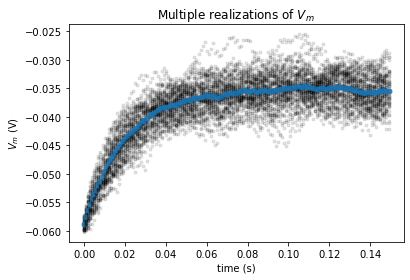

In [10]:
np.random.seed(2020)

step_end = int(t_max/dt)
n = 50

v_n = [el] * n

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    
    t = step * dt
    
    #sum range 0 to n
    for j in range(0, n):
        
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
        
    v_mean = sum(v_n) / n
    
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)
plt.show()    

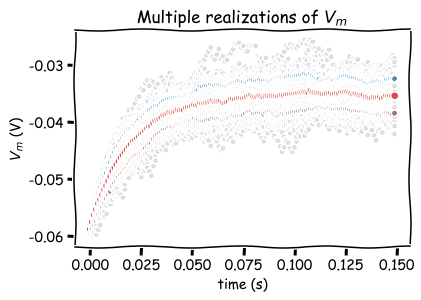

In [11]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    # Compute sample mean
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v - v_mean)**2 for v in v_n]

    # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n) / (n - 1)

    # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C3.', alpha=0.8, markersize=10)

    # Plot mean + standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean + v_std, 'C0.', alpha=0.8)

    # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean - v_std, 'C5.', alpha=0.8)


  # Display plot
  plt.show()

Rewrite the single neuron plot with random input from Exercise 7 with numpy arrays.

The time range, voltage values, and synaptic current are initialized or pre-computed as numpy arrays before numerical integration. We use np.linspace to initialize a numpy array t_range with num=step_end=150 values from 0 to t_max We use np.ones to initialize a numpy array v with step_end + 1 leak potential values el. You will pre-compute step_end synaptic current values in numpy array i with np.random.random(step_end) for step_end random numbers. Since v[0]=el, we should iterate for step_end steps but skip step=0.

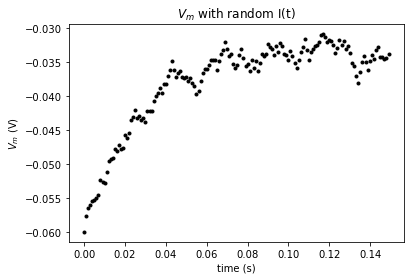

In [12]:
np.random.seed(2020)

step_end = int(t_max/dt) 
t_range = np.linspace(0,t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

i = i_mean *( 1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) -1))

for step in range(1, step_end):
    
    v[step] = v[step-1] + (dt/tau) * (el - v[step-1] + r*i[step])
    
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()
    

Let’s practice using enumerate to iterate over the indexes and values of the synaptic current array i. We want to get the step and the value of i at that step i_step

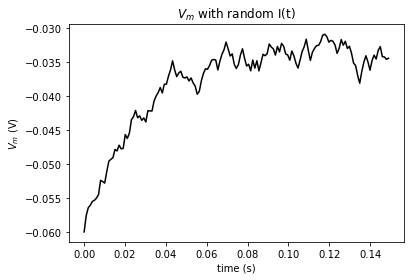

In [13]:
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i_step)


plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()  

# 2D ARRAY

Coding Exercise 13: Using 2d arrays
Plot multiple realizations (N=50) of V(t) by storing the voltage of each neuron at time t in a numpy array.

We first initialize a numpy array v_n of shape (n, step_end) with membrane leak potential values el. We pre-compute synaptic current values in numpy array i of shape (n, step_end). After computing v, we plot results with a single plot command, by providing v_n.T to the plot function. v_n.T is the transposed version of v_n (with rows and columns swapped).

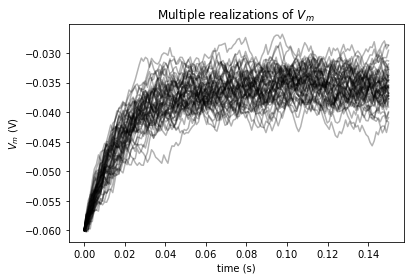

In [14]:

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])


plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)
plt.show()

Coding Exercise 14: Plotting sample mean and standard deviation
Add sample mean ⟨V(t)⟩ and standard deviation σ(t)≡Var(t)−−−−−−√ to the plot.

np.mean(v_n, axis=0) computes mean over rows, i.e. mean for each neuron

np.mean(v_n, axis=1) computes mean over columns (axis 1), i.e. mean for each time step

We will use label argument in plt.plot to specify labels in each trace. We label only the last voltage trace to avoid labeling all N of them.

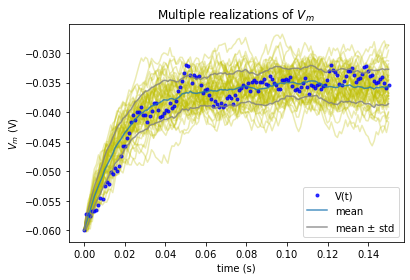

In [15]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])

i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

    # Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'y', alpha=0.3)

plt.plot(t_range, v_n[-1], 'b.', alpha=0.8, label='V(t)' )
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean + v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean - v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

plt.legend()
plt.show()

LIF without input
Exact Solution of the LIF model without input:

The LIF model has the exact solution:

    V(t)=EL+(Vreset−EL)e−t/τm
    
where τm is the time constant, V is the membrane potential, EL is the resting potential, and Vreset is the initial membrane potential.

The LIF with a constant input has a known exact solution:

(80)
V(t)=EL+RmI+(Vreset−EL−RmI)e−tτm
which is written as:

"Current membranepotential"="Resting potential"+"Reset potential minus resting potentialtimes exponential with rate one over time constant." 
The plot below shows the exact solution of the membrane potential with the parameters set as:

V_reset = -75,

E_L = -75,

tau_m = 10,

R_m = 10,

I = 10.

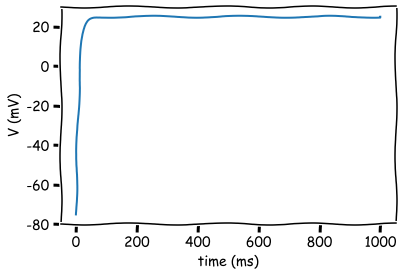

In [16]:
dt = 0.5
t_rest = 0

t = np.arange(0, 1000, dt)

tau_m = 10
R_m = 10
V_reset = E_L = -75

I = 10

V = E_L + R_m*I + (V_reset - E_L - R_m*I) * np.exp(-(t)/tau_m)

with plt.xkcd():

  fig = plt.figure(figsize=(6, 4))
  plt.plot(t,V)
  plt.ylabel('V (mV)')
  plt.xlabel('time (ms)')
  plt.show()


In [19]:
# @title Figure Settings
import IPython.display as ipd
from matplotlib import gridspec

import ipywidgets as widgets  # interactive display
from ipywidgets import Label
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

In [20]:
# @title Plotting Functions

time = np.arange(0, 1, 0.01)

def plot_slope(dt):
  """
    Args:
      dt  : time-step
    Returns:
      A figure of an exponential, the slope of the exponential and the derivative exponential
  """

  t = np.arange(0, 5+0.1/2, 0.1)

  with plt.xkcd():

    fig = plt.figure(figsize=(6, 4))
    # Exponential
    p = np.exp(0.3*t)
    plt.plot(t, p, label='y')
    # slope
    plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1+dt))],':og',label=r'$\frac{y(1+\Delta t)-y(1)}{\Delta t}$')
    # derivative
    plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1))+dt*0.3*np.exp(0.3*(1))],'-k',label=r'$\frac{dy}{dt}$')
    plt.legend()
    plt.plot(1+dt, np.exp(0.3*(1+dt)), 'og')
    plt.ylabel('y')
    plt.xlabel('t')
    plt.show()



def plot_StepEuler(dt):
  """
    Args:
      dt  : time-step
    Returns:
      A figure of one step of the Euler method for an exponential growth function
  """

  t=np.arange(0, 1 + dt + 0.1 / 2, 0.1)

  with plt.xkcd():
    fig = plt.figure(figsize=(6,4))
    p=np.exp(0.3*t)
    plt.plot(t,p)
    plt.plot([1,],[np.exp(0.3*1)],'og',label='Known')
    plt.plot([1,1+dt],[np.exp(0.3*1),np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1)],':g',label=r'Euler')
    plt.plot(1+dt,np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1),'or',label=r'Estimate $p_1$')
    plt.plot(1+dt,p[-1],'bo',label=r'Exact $p(t_1)$')
    plt.vlines(1+dt,np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1),p[-1],colors='r', linestyles='dashed',label=r'Error $e_1$')
    plt.text(1+dt+0.1,(np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1)+p[-1])/2,r'$e_1$')
    plt.legend()
    plt.ylabel('Population (millions)')
    plt.xlabel('time(years)')
    plt.show()

def visualize_population_approx(t, p):
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, np.exp(0.3*t), 'k', label='Exact Solution')

    plt.plot(t, p,':o', label='Euler Estimate')
    plt.vlines(t, p, np.exp(0.3*t),
              colors='r', linestyles='dashed', label=r'Error $e_k$')

    plt.ylabel('Population (millions)')
    plt.legend()
    plt.xlabel('Time (years)')
    plt.show()

## LIF PLOT
def plot_IF(t, V, I, Spike_time):
  """
    Args:
      t  : time
      V  : membrane Voltage
      I  : Input
      Spike_time : Spike_times
    Returns:
      figure with three panels
      top panel: Input as a function of time
      middle panel: membrane potential as a function of time
      bottom panel: Raster plot
  """

  with plt.xkcd():
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(3, 1,  height_ratios=[1, 4, 1])
    # PLOT OF INPUT
    plt.subplot(gs[0])
    plt.ylabel(r'$I_e(nA)$')
    plt.yticks(rotation=45)
    plt.plot(t,I,'g')
    #plt.ylim((2,4))
    plt.xlim((-50,1000))
    # PLOT OF ACTIVITY
    plt.subplot(gs[1])
    plt.plot(t,V,':')
    plt.xlim((-50,1000))
    plt.ylabel(r'$V(t)$(mV)')
    # PLOT OF SPIKES
    plt.subplot(gs[2])
    plt.ylabel(r'Spike')
    plt.yticks([])
    plt.scatter(Spike_time,1*np.ones(len(Spike_time)), color="grey", marker=".")
    plt.xlim((-50,1000))
    plt.xlabel('time(ms)')
    plt.show()

def plot_rErI(t, r_E, r_I):
  """
    Args:
      t   : time
      r_E : excitation rate
      r_I : inhibition rate

    Returns:
      figure of r_I and r_E as a function of time

  """
  with plt.xkcd():
    fig = plt.figure(figsize=(6,4))
    plt.plot(t,r_E,':',color='b',label=r'$r_E$')
    plt.plot(t,r_I,':',color='r',label=r'$r_I$')
    plt.xlabel('time(ms)')
    plt.legend()
    plt.ylabel('Firing Rate (Hz)')
    plt.show()


def plot_rErI_Simple(t, r_E, r_I):
  """
    Args:
      t   : time
      r_E : excitation rate
      r_I : inhibition rate

    Returns:
      figure with two panels
      left panel: r_I and r_E as a function of time
      right panel: r_I as a function of r_E with Nullclines

  """
  with plt.xkcd():
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2)
    # LEFT PANEL
    plt.subplot(gs[0])
    plt.plot(t,r_E,':',color='b',label=r'$r_E$')
    plt.plot(t,r_I,':',color='r',label=r'$r_I$')
    plt.xlabel('time(ms)')
    plt.legend()
    plt.ylabel('Firing Rate (Hz)')
    # RIGHT PANEL
    plt.subplot(gs[1])
    plt.plot(r_E,r_I,'k:')
    plt.plot(r_E[0],r_I[0],'go')

    plt.hlines(0,np.min(r_E),np.max(r_E),linestyles="dashed",color='b',label=r'$\frac{d}{dt}r_E=0$')
    plt.vlines(0,np.min(r_I),np.max(r_I),linestyles="dashed",color='r',label=r'$\frac{d}{dt}r_I=0$')

    plt.legend(loc='upper left')

    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')
    plt.show()

def plot_rErI_Matrix(t, r_E, r_I, Null_rE, Null_rI):
  """
    Args:
      t   : time
      r_E : excitation firing rate
      r_I : inhibition firing rate
      Null_rE: Nullclines excitation firing rate
      Null_rI: Nullclines inhibition firing rate
    Returns:
      figure with two panels
      left panel: r_I and r_E as a function of time
      right panel: r_I as a function of r_E with Nullclines

  """

  with plt.xkcd():
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2)
    plt.subplot(gs[0])
    plt.plot(t,r_E,':',color='b',label=r'$r_E$')
    plt.plot(t,r_I,':',color='r',label=r'$r_I$')
    plt.xlabel('time(ms)')
    plt.ylabel('Firing Rate (Hz)')
    plt.legend()
    plt.subplot(gs[1])
    plt.plot(r_E,r_I,'k:')
    plt.plot(r_E[0],r_I[0],'go')

    plt.plot(r_E,Null_rE,':',color='b',label=r'$\frac{d}{dt}r_E=0$')
    plt.plot(r_E,Null_rI,':',color='r',label=r'$\frac{d}{dt}r_I=0$')
    plt.legend(loc='best')
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')
    plt.show()

Euler error for a single step

Coding Exercise 1.3: Step, step, step
Given the population differential equation:

ddtp(t)=0.3p(t),
and the initial condition:

p(t0=1)=e0.3,
code the difference equation:

p[k+1]p[0]=p[k]+Δt(0.3p[k]),
p[0]=e0.3,Initial Condition,for k=0,1,⋯4,
to estimate the population on the interval [1,5] with a time-step Δt=1, denoted by dt in code.

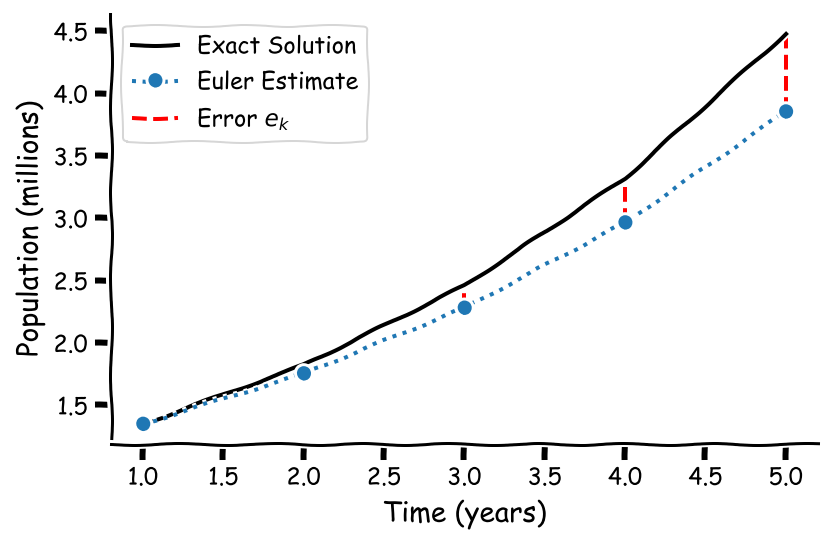

In [22]:
# Time step
dt = 1

# Make time range from 1 to 5 years with step size dt
t = np.arange(1, 5+dt/2, dt)

# Get number of steps
n = len(t)

# Initialize p array
p = np.zeros(n)
p[0] = np.exp(0.3*t[0]) # initial condition

# Loop over steps
for k in range(n-1):

  # Calculate the population step
    p[k+1] = p[k] + dt * 0.3 * p[k]

# Visualize
with plt.xkcd():
  visualize_population_approx(t, p)

LIF and Euler
Code the difference equation for the LIF:


V[k+1]=V[k]+Δt(−(V[k]−EL)+RmI[k]τm),for k=0⋯n−1,
with the given parameters set as:

V_reset = -75,

E_L = -75,

tau_m = 10,

R_m = 10.

We will then visualize the result. The figure has three panels:

the top panel is the sinusoidal input, I,

the middle panel is the estimate membrane potential Vk. To illustrate a spike, Vk is set to 0 and then reset,

the bottom panel is the raster plot with each dot indicating a spike.

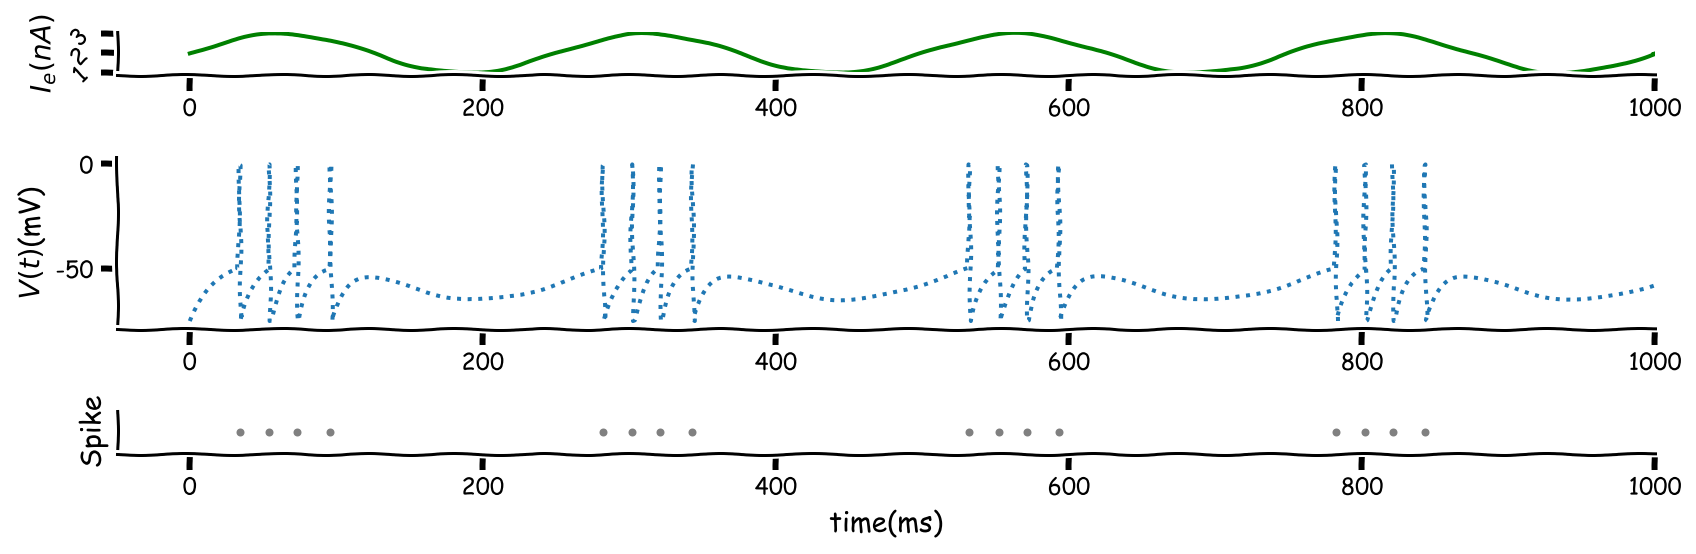

In [21]:
def Euler_Integrate_and_Fire(I, time, dt):
  """
  Args:
    I: Input
    time: time
    dt: time-step
  Returns:
    Spike: Spike count
    Spike_time: Spike times
    V: membrane potential esitmated by the Euler method
  """

  Spike = 0
  tau_m = 10
  R_m = 10
  t_isi = 0
  V_reset = E_L = -75
  n = len(time)
  V = V_reset * np.ones(n)
  V_th = -50
  Spike_time = []

  for k in range(n-1):
    dV = (-(V[k] - E_L) + R_m*I[k]) / tau_m
    V[k+1] = V[k] + dt*dV

    # Discontinuity for Spike
    if V[k] > V_th:
      V[k] = 0
      V[k+1] = V_reset
      t_isi = time[k]
      Spike = Spike + 1
      Spike_time = np.append(Spike_time, time[k])

  return Spike, Spike_time, V

# Set up time step and current
dt = 1
t = np.arange(0, 1000, dt)
I = np.sin(4 * 2 * np.pi * t/1000) + 2

# Model integrate and fire neuron
Spike, Spike_time, V = Euler_Integrate_and_Fire(I, t, dt)

# Visualize
with plt.xkcd():
  plot_IF(t, V,I,Spike_time)

# Probability Distributions

We will cover the basic ideas from probability and statistics, as a reminder of what you have hopefully previously learned. These ideas will be important for almost every one of the following topics covered in the course.

There are many additional topics within probability and statistics that we will not cover as they are not central to the main course. We also do not have time to get into a lot of details, but this should help you recall material you have previously encountered.

By completing the exercises in this tutorial, you should:

get some intuition about how stochastic randomly generated data can be

understand how to model data using simple probability distributions

understand the difference between discrete and continuous probability distributions

be able to plot a Gaussian distribution

In [24]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm  # the normal probability distribution

In [30]:
# @title Plotting Functions

def plot_random_sample(x, y, figtitle = None):
  """ Plot the random sample between 0 and 1 for both the x and y axes.

    Args:
      x (ndarray): array of x coordinate values across the random sample
      y (ndarray): array of y coordinate values across the random sample
      figtitle (str): title of histogram plot (default is no title)

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.xlim([-0.25, 1.25]) # set x and y axis range to be a bit less than 0 and greater than 1
  plt.ylim([-0.25, 1.25])
  plt.scatter(dataX, dataY)
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_random_walk(x, y, figtitle = None):
  """ Plots the random walk within the range 0 to 1 for both the x and y axes.

    Args:
      x (ndarray): array of steps in x direction
      y (ndarray): array of steps in y direction
      figtitle (str): title of histogram plot (default is no title)

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  plt.plot(x,y,'b-o', alpha = 0.5)
  plt.xlim(-0.1,1.1)
  plt.ylim(-0.1,1.1)
  ax.set_xlabel('x location')
  ax.set_ylabel('y location')
  plt.plot(x[0], y[0], 'go')
  plt.plot(x[-1], y[-1], 'ro')

  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_hist(data, xlabel, figtitle = None, num_bins = None):
  """ Plot the given data as a histogram.

    Args:
      data (ndarray): array with data to plot as histogram
      xlabel (str): label of x-axis
      figtitle (str): title of histogram plot (default is no title)
      num_bins (int): number of bins for histogram (default is 10)

    Returns:
      count (ndarray): number of samples in each histogram bin
      bins (ndarray): center of each histogram bin
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Count')
  if num_bins is not None:
    count, bins, _ = plt.hist(data, bins = num_bins)
  else:
    count, bins, _ = plt.hist(data, bins = np.arange(np.min(data)-.5, np.max(data)+.6)) # 10 bins default
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()
  return count, bins


def my_plot_single(x, px):
  """
  Plots normalized Gaussian distribution

    Args:
        x (numpy array of floats):     points at which the likelihood has been evaluated
        px (numpy array of floats):    normalized probabilities for prior evaluated at each `x`

    Returns:
        Nothing.
  """
  if px is None:
      px = np.zeros_like(x)

  fig, ax = plt.subplots()
  ax.plot(x, px, '-', color='C2', linewidth=2, label='Prior')
  ax.legend()
  ax.set_ylabel('Probability')
  ax.set_xlabel('Orientation (Degrees)')
  plt.show()


def plot_gaussian_samples_true(samples, xspace, mu, sigma, xlabel, ylabel):
  """ Plot a histogram of the data samples on the same plot as the gaussian
  distribution specified by the give mu and sigma values.

    Args:
      samples (ndarray): data samples for gaussian distribution
      xspace (ndarray): x values to sample from normal distribution
      mu (scalar): mean parameter of normal distribution
      sigma (scalar): variance parameter of normal distribution
      xlabel (str): the label of the x-axis of the histogram
      ylabel (str): the label of the y-axis of the histogram

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  # num_samples = samples.shape[0]

  count, bins, _ = plt.hist(samples, density=True)
  plt.plot(xspace, norm.pdf(xspace, mu, sigma),'r-')
  plt.show()

# Stochasticity and randomness

Random walk:

Stochastic models can be used to create models of behaviour. As an example, imagine that a rat is placed inside a novel environment, a box. We could try and model its exploration behaviour by assuming that for each time step it takes a random uniformly sampled step in any direction (simultaneous random step in x direction and random step in y direction)


Coding Exercise 1.2: Modeling a random walk

Use the generate_random_sample function from above to obtain the random steps the rat takes at each time step and complete the generate_random_walk function below. For plotting, the box will be represented graphically as the unit square enclosed by the points (0,0) and (1,1).

In [82]:
def generate_random_walk(num_steps, step_size):
  """ Generate the points of a random walk within a 1 X 1 box.

  Args:
    num_steps (int): number of steps in the random walk
    step_size (float): how much each random step size is weighted

  Returns:
    x, y (ndarray, ndarray): the (x, y) locations reached at each time step of the walk

  """
  x = np.zeros(num_steps + 1)
  y = np.zeros(num_steps + 1)

  # Generate the uniformly random x, y steps for the walk
  random_x_steps, random_y_steps = generate_random_sample(num_steps)

  # Take steps according to the randomly sampled steps above
  for step in range(num_steps):

    # take a random step in x and y. We remove 0.5 to make it centered around 0
    x[step + 1] = x[step] + (random_x_steps[step] - 0.5)*step_size
    y[step + 1] = y[step] + (random_y_steps[step] - 0.5)*step_size

    # restrict to be within the 1 x 1 unit box
    x[step + 1]= min(max(x[step + 1], 0), 1)
    y[step + 1]= min(max(y[step + 1], 0), 1)

  return x, y

# Set a random seed
np.random.seed(2)

# Select parameters
num_steps = 100   # number of steps in random walk
step_size = 0.5   # size of each step

# Generate the random walk
x, y = generate_random_walk(num_steps, step_size)

# Visualize
plot_random_walk(x, y, "Rat's location throughout random walk")

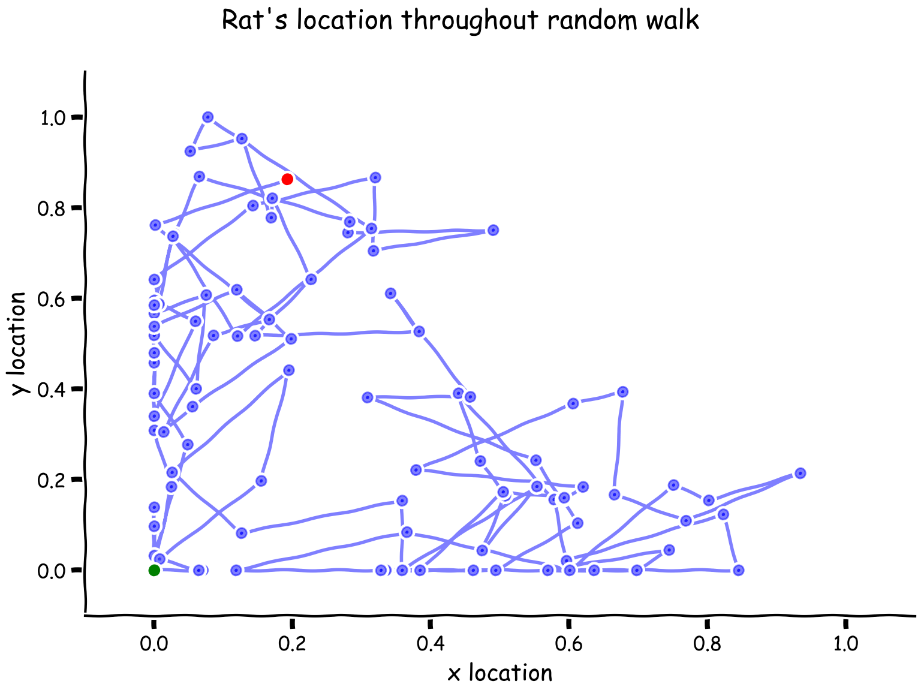

1)What could an increased step size mean for the actual rat’s movement we are simulating?
A larger step size could mean that the rat is moving faster, or that we sample the rats location less often.

2)For a given number of steps, is the rat more likely to visit all general areas of the arena with a big step size or small step size?
A larger step size could mean that the rat is moving faster, or that we sample the rats location less often.
   
In practice a uniform random movement is too simple an assumption. Rats do not move completely randomly; even if you could assume that, you would need to approximate with a more complex probability distribution.

Nevertheless, this example highlights how you can use sampling to approximate behaviour.

# Discrete distributions

Binomial distributions

The binomial distribution simulates n number of binary events, such as the Left,Right choices of the random rat in the T-maze. Imagine that you have done an experiment and found that your rat turned left in 7 out of 10 trials. What is the probability of the rat indeed turning left 7 times (k=7)?

This is given by the binomial probability of k, given n trials and probability p:

(97)
P(k|n,p)(nk)=(nk)pk(1−p)n−k=n!k!(n−k)!
In this formula, p is the probability of turning left, n is the number of binary events, or trials, and k is the number of times the rat turned left. The term (nk) is the binomial coefficient.

This is an example of a probability mass function, which specifies the probability that a discrete random variable is equal to each value. In other words, how large a part of the probability space (mass) is placed at each exact discrete value. We require that all probability adds up to 1, i.e. that

(98)
∑kP(k|n,p)=1.
Essentially, if k can only be one of 10 values, the probabilities of k being equal to each possible value have to sum up to 1 because there is a probability of 1 it will equal one of those 10 values (no other options exist).

If we assume an equal chance of turning left or right, then p=0.5. Note that if we only have a single trial n=1 this is equivalent to a single Bernoulli trial (feel free to do the math!).

# Poisson distribution

what is the probability that a neuron within a second will fire x times?

- Assumes that each spikes is independent ofthe previous one 
- Average firing rate LAMDA
- In inference you may measure the average firing rate, but want to know how variable that is.



The formula for a Poisson distribution on x is:

P(x)=λ^x*e^−λ / x!

where λ is a parameter corresponding to the average outcome of x.

In [83]:
#Poisson distribution sampling

#Set random seed
np.random.seed(0)

# Draw 5 samples from a Poisson distribution with lambda = 4
sampled_spike_counts = np.random.poisson(4, 5)

# Print the counts
print("The samples drawn from the Poisson distribution are " +
          str(sampled_spike_counts))

The samples drawn from the Poisson distribution are [6 7 1 8 4]


You should see that the neuron spiked 6 times, 7 times, 1 time, 8 times, and 4 times in 5 different intervals.

https://compneuro.neuromatch.io/tutorials/W0D5_Statistics/student/W0D5_Tutorial1.html

# Gaussian distribution

The most widely used continuous distribution is probably the Gaussian (also known as Normal) distribution. It is extremely common across all kinds of statistical analyses. Because of the central limit theorem, many quantities are Gaussian distributed. Gaussians also have some nice mathematical properties that permit simple closed-form solutions to several important problems.

As a working example, imagine that a human participant is asked to point in the direction where they perceived a sound coming from. As an approximation, we can assume that the variability in the direction/orientation they point towards is Gaussian distributed.

In this exercise, you will implement a Gaussian by filling in the missing portions of code for the function my_gaussian below. Gaussians have two parameters. The mean μ, which sets the location of its center, and its “scale” or spread is controlled by its standard deviation σ, or variance σ2 (i.e. the square of standard deviation). Be careful not to use one when the other is required.

The equation for a Gaussian probability density function is:

(103)
f(x;μ,σ2)=N(μ,σ2)=1/squr(2πσ)√exp(−(x−μ)^2/2σ^2)
In Python π and e can be written as np.pi and np.exp respectively.

As a probability distribution this has an integral of one when integrated from −∞ to ∞, however in the following your numerical Gaussian will only be computed over a finite number of points (for the cell below we will sample from -8 to 9 in step sizes of 0.1). You therefore need to explicitly normalize it to sum to one yourself.

Test out your implementation with a μ=−1 and σ=1.

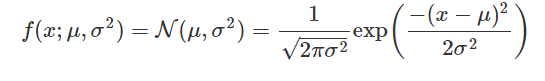

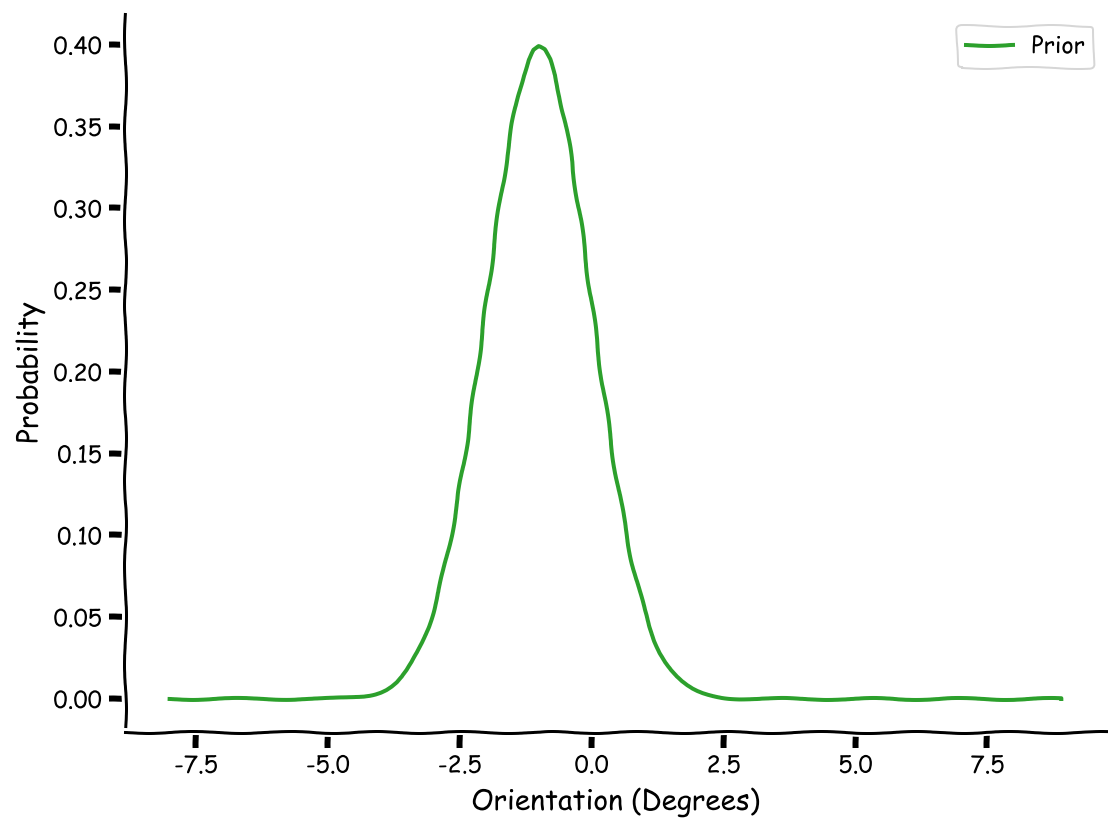

In [84]:
def my_gaussian(x_points, mu, sigma):
  """ Returns normalized Gaussian estimated at points `x_points`, with
  parameters: mean `mu` and standard deviation `sigma`
  Args:
      x_points (ndarray of floats): points at which the gaussian is evaluated
      mu (scalar): mean of the Gaussian
      sigma (scalar): standard deviation of the gaussian
  Returns:
      (numpy array of floats) : normalized Gaussian evaluated at `x`
  """

  px = 1/(2*np.pi*sigma**2)**1/2 *np.exp(-(x_points-mu)**2/(2*sigma**2))

  # as we are doing numerical integration we have to remember to normalise
  # taking into account the stepsize (0.1)
  px = px/(0.1*sum(px))
  return px

x = np.arange(-8, 9, 0.1)

# Generate Gaussian
px = my_gaussian(x, -1, 1)

# Visualize
with plt.xkcd():
  my_plot_single(x, px)

In [86]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm
from numpy.random import default_rng  # a default random number generator

# @title Plotting & Helper functions

def plot_hist(data, xlabel, figtitle = None, num_bins = None):
  """ Plot the given data as a histogram.

    Args:
      data (ndarray): array with data to plot as histogram
      xlabel (str): label of x-axis
      figtitle (str): title of histogram plot (default is no title)
      num_bins (int): number of bins for histogram (default is 10)

    Returns:
      count (ndarray): number of samples in each histogram bin
      bins (ndarray): center of each histogram bin
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Count')
  if num_bins is not None:
    count, bins, _ = plt.hist(data, max(data), bins=num_bins)
  else:
    count, bins, _ = plt.hist(data, max(data))  # 10 bins default
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()
  return count, bins

def plot_gaussian_samples_true(samples, xspace, mu, sigma, xlabel, ylabel):
  """ Plot a histogram of the data samples on the same plot as the gaussian
  distribution specified by the give mu and sigma values.

    Args:
      samples (ndarray): data samples for gaussian distribution
      xspace (ndarray): x values to sample from normal distribution
      mu (scalar): mean parameter of normal distribution
      sigma (scalar): variance parameter of normal distribution
      xlabel (str): the label of the x-axis of the histogram
      ylabel (str): the label of the y-axis of the histogram

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  # num_samples = samples.shape[0]

  count, bins, _ = plt.hist(samples, density=True)  # probability density function

  plt.plot(xspace, norm.pdf(xspace, mu, sigma), 'r-')
  plt.show()


def plot_likelihoods(likelihoods, mean_vals, variance_vals):
  """ Plot the likelihood values on a heatmap plot where the x and y axes match
  the mean and variance parameter values the likelihoods were computed for.

    Args:
      likelihoods (ndarray): array of computed likelihood values
      mean_vals (ndarray): array of mean parameter values for which the
                            likelihood was computed
      variance_vals (ndarray): array of variance parameter values for which the
                            likelihood was computed

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  im = ax.imshow(likelihoods)

  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel('log likelihood', rotation=-90, va="bottom")

  ax.set_xticks(np.arange(len(mean_vals)))
  ax.set_yticks(np.arange(len(variance_vals)))
  ax.set_xticklabels(mean_vals)
  ax.set_yticklabels(variance_vals)
  ax.set_xlabel('Mean')
  ax.set_ylabel('Variance')
  plt.show()


def posterior_plot(x, likelihood=None, prior=None,
                   posterior_pointwise=None, ax=None):
  """
  Plots normalized Gaussian distributions and posterior.

    Args:
        x (numpy array of floats):         points at which the likelihood has been evaluated
        auditory (numpy array of floats):  normalized probabilities for auditory likelihood evaluated at each `x`
        visual (numpy array of floats):    normalized probabilities for visual likelihood evaluated at each `x`
        posterior (numpy array of floats): normalized probabilities for the posterior evaluated at each `x`
        ax: Axis in which to plot. If None, create new axis.

    Returns:
        Nothing.
  """
  if likelihood is None:
      likelihood = np.zeros_like(x)

  if prior is None:
      prior = np.zeros_like(x)

  if posterior_pointwise is None:
      posterior_pointwise = np.zeros_like(x)

  if ax is None:
    fig, ax = plt.subplots()

  ax.plot(x, likelihood, '-C1', linewidth=2, label='Auditory')
  ax.plot(x, prior, '-C0', linewidth=2, label='Visual')
  ax.plot(x, posterior_pointwise, '-C2', linewidth=2, label='Posterior')
  ax.legend()
  ax.set_ylabel('Probability')
  ax.set_xlabel('Orientation (Degrees)')
  plt.show()

  return ax


def plot_classical_vs_bayesian_normal(num_points, mu_classic, var_classic,
                                      mu_bayes, var_bayes):
  """ Helper function to plot optimal normal distribution parameters for varying
  observed sample sizes using both classic and Bayesian inference methods.

    Args:
      num_points (int): max observed sample size to perform inference with
      mu_classic (ndarray): estimated mean parameter for each observed sample size
                                using classic inference method
      var_classic (ndarray): estimated variance parameter for each observed sample size
                                using classic inference method
      mu_bayes (ndarray): estimated mean parameter for each observed sample size
                                using Bayesian inference method
      var_bayes (ndarray): estimated variance parameter for each observed sample size
                                using Bayesian inference method

    Returns:
      Nothing.
  """
  xspace = np.linspace(0, num_points, num_points)
  fig, ax = plt.subplots()
  ax.set_xlabel('n data points')
  ax.set_ylabel('mu')
  plt.plot(xspace, mu_classic,'r-', label="Classical")
  plt.plot(xspace, mu_bayes,'b-', label="Bayes")
  plt.legend()
  plt.show()

  fig, ax = plt.subplots()
  ax.set_xlabel('n data points')
  ax.set_ylabel('sigma^2')
  plt.plot(xspace, var_classic,'r-', label="Classical")
  plt.plot(xspace, var_bayes,'b-', label="Bayes")
  plt.legend()
  plt.show()

# categoriol distribution

MARKOV CHAINS

We will practice more probability theory by looking at Markov chains. The Markov property specifies that you can fully encapsulate the important properties of a system based on its current state at the current time, any previous history does not matter. It is memoryless.

As an example imagine that a rat is able to move freely between 3 areas: a dark rest area (state=1), a nesting area (state=2) and a bright area for collecting food (state=3). Every 5 minutes (timepoint i) we record the rat’s location. We can use a categorical distribution to look at the probability that the rat moves to one state from another.

The table below shows the probability of the rat transitioning from one area to another between timepoints (statei to statei+1).

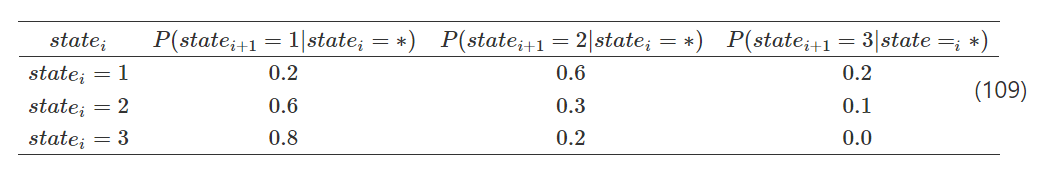

In [88]:
# Transition matrix
transition_matrix = np.array([[ 0.2, 0.6, 0.2], [ .6, 0.3, 0.1], [0.8, 0.2, 0]])

# Initial state, p0
p0 = np.array([0, 1, 0])

# Compute the probabilities 4 transitions later (use np.linalg.matrix_power to raise a matrix a power)
p4 = p0 @ np.linalg.matrix_power(transition_matrix, 4)

# The second area is indexed as 1 (Python starts indexing at 0)
print(f"The probability the rat will be in area 2 after 4 transitions is: {p4[1]}")


# Initialize random initial distribution
p_random = np.ones((1, 3))/3

# Fill in the missing line to get the state matrix after 100 transitions, like above
p_average_time_spent = p_random @ np.linalg.matrix_power(transition_matrix, 100)
print(f"The proportion of time spend by the rat in each of the three states is: {p_average_time_spent[0]}")

The probability the rat will be in area 2 after 4 transitions is: 0.4311
The proportion of time spend by the rat in each of the three states is: [0.44736842 0.42105263 0.13157895]


# Statistical Inference and likelihood

LIKELIHOODS
https://www.youtube.com/watch?v=7aiKvKlYwR0

While the likelihood may be written as a conditional probability (P(x|μ,σ)), we refer to it as the likelihood function, L(μ,σ). This slight switch in notation is to emphasize our focus: we use likelihood functions when the data points x are fixed and we are focused on the parameters.

Our new notation makes clear that the likelihood L(μ,σ) is a function of μ and σ, not of x.

In the last tutorial we reviewed how the data was generated given the selected parameters of the generative process. If we do not know the parameters μ, σ that generated the data, we can try to infer which parameter values (given our model) gives the best (highest) likelihood. This is what we call statistical inference: trying to infer what parameters make our observed data the most likely or probable?

Computing likelihood
Let’s start with computing the likelihood of some set of data points being drawn from a Gaussian distribution with a mean and variance we choose.

As multiplying small probabilities together can lead to very small numbers, it is often convenient to report the logarithm of the likelihood. This is just a convenient transformation and as logarithm is a monotonically increasing function this does not change what parameters maximise the function.


In [92]:
def compute_likelihood_normal(x, mean_val, standard_dev_val):
  """ Computes the log-likelihood values given a observed data sample x, and
  potential mean and variance values for a normal distribution
    Args:
      x (ndarray): 1-D array with all the observed data
      mean_val (scalar): value of mean for which to compute likelihood
      standard_dev_val (scalar): value of variance for which to compute likelihood
    Returns:
      likelihood (scalar): value of likelihood for this combination of means/variances
  """

  # Get probability of each data point (use norm.pdf from scipy stats)
  p_data = norm.pdf(x, mean_val, standard_dev_val)

  # Compute likelihood (sum over the log of the probabilities)
  likelihood = np.sum(np.log(p_data))

  return likelihood

# Set random seed
np.random.seed(0)

# Generate data
true_mean = 5
true_standard_dev = 1
n_samples = 1000
x = np.random.normal(true_mean, true_standard_dev, size = (n_samples,))

# Compute likelihood for a guessed mean/standard dev
guess_mean = 4
guess_standard_dev = .1
likelihood = compute_likelihood_normal(x, guess_mean, guess_standard_dev)
print(likelihood)

-92904.81398544145


You should get a likelihood of -92904.81. This is somewhat meaningless to us! For it to be useful, we need to compare it to the likelihoods computing using other guesses of the mean or standard deviation. The visualization below shows us the likelihood for various values of the mean and the standard deviation. Essentially, we are performing a rough grid-search over means and standard deviations. What would you guess as the true mean and standard deviation based on this visualization?

Execute to visualize likelihoods
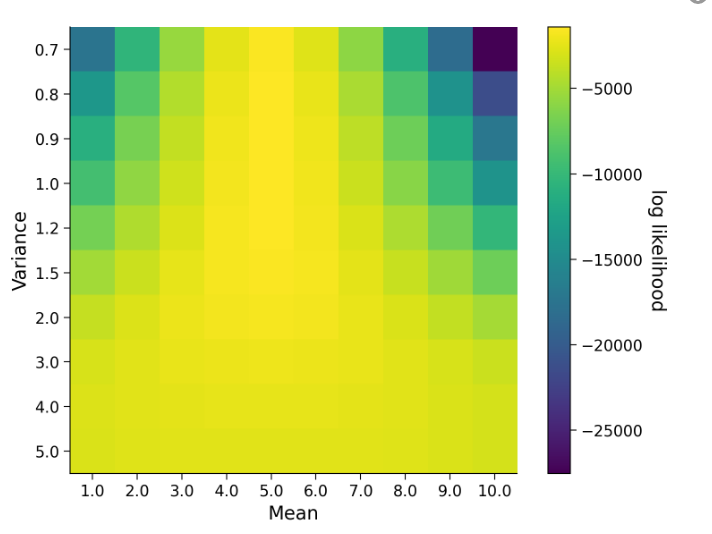

# Searching for best parameters

Maximum likelihood

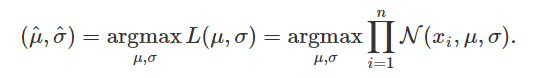



We want to do inference on this data set, i.e. we want to infer the parameters that most likely gave rise to the data given our model. Intuitively that means that we want as good as possible a fit between the observed data and the probability distribution function with the best inferred parameters. We can search for the best parameters manually by trying out a bunch of possible values of the parameters, computing the likelihoods, and picking the parameters that resulted in the highest likelihood.


# Optimization to find parameters

Let’s again assume that we have a data set, x, assumed to be generated by a normal distribution (we actually generate it ourselves in line 1, so we know how it was generated!). We want to maximise the likelihood of the parameters μ and σ2. We can do so using a couple of tricks:


Using a log transform will not change the maximum of the function, but will allow us to work with very small numbers that could lead to problems with machine precision.

Maximising a function is the same as minimising the negative of a function, allowing us to use the minimize optimisation provided by scipy.

The optimisation will be done using sp.optimize.minimize, which does a version of gradient descent (there are hundreds of ways to do numerical optimisation, we will not cover these here!).


In [94]:
# We define the function to optimise, the negative log likelihood
def negLogLike(theta, x):
  """ Function for computing the negative log-likelihood given the observed data
      and given parameter values stored in theta.
      Args:
        theta (ndarray): normal distribution parameters
                        (mean is theta[0], standard deviation is theta[1])
        x (ndarray): array with observed data points
      Returns:
        Calculated negative Log Likelihood value!
  """
  return -sum(np.log(norm.pdf(x, theta[0], theta[1])))

# Set random seed
np.random.seed(0)

# Generate data
true_mean = 5
true_standard_dev = 1
n_samples = 1000
x = np.random.normal(true_mean, true_standard_dev, size=(n_samples, ))

# Define bounds, var has to be positive
bnds = ((None, None), (0, None))

# Optimize with scipy!
optimal_parameters = sp.optimize.minimize(negLogLike, (2, 2), args=x, bounds=bnds)
print(f"The optimal mean estimate is: {optimal_parameters.x[0]}")
print(f"The optimal standard deviation estimate is: {optimal_parameters.x[1]}")

# optimal_parameters contains a lot of information about the optimization,
# but we mostly want the mean and standard deviation

The optimal mean estimate is: 5.280354082418696
The optimal standard deviation estimate is: 1.1481861785828575


C:\Users\thend\AppData\Local\Temp\ipykernel_24588\23409155.py:12: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log(norm.pdf(x, theta[0], theta[1])))


# Bayesian Inference

We will start to introduce Bayesian inference here to contrast with our maximum likelihood methods, but you will also revisit Bayesian inference in great detail on W3D1 of the course so we won’t dive into all details.

For Bayesian inference we do not focus on the likelihood function L(y)=P(x|y), but instead focus on the posterior distribution:

(119)
P(y|x)=P(x|y)P(y)P(x)
which is composed of the likelihood function P(x|y), the prior P(y) and a normalising term P(x) (which we will ignore for now).

While there are other advantages to using Bayesian inference (such as the ability to derive Bayesian Nets, see optional bonus task below), we will start by focusing on the role of the prior in inference. Does including prior information allow us to infer parameters in a better way?

Bayesian inference with Gaussian distribution

In the above sections we performed inference using maximum likelihood, i.e. finding the parameters that maximised the likelihood of a set of parameters, given the model and data.

We will now repeat the inference process, but with an added Bayesian prior, and compare it to the “classical” inference (maximum likelihood) process we did before (Section 2). When using conjugate priors (more on this below) we can just update the parameter values of the distributions (here Gaussian distributions).

For the prior we start by guessing a mean of 5 (mean of previously observed data points 4 and 6) and variance of 1 (variance of 4 and 6). We use a trick (not detailed here) that is a simplified way of applying a prior, that allows us to just add these 2 values (pseudo-data) to the real data.

See the visualization below that shows the mean and standard deviation inferred by our classical maximum likelihood approach and the Bayesian approach for different numbers of data points.

Remembering that our true values are μ=5, and σ2=1, how do the Bayesian inference and classical inference compare?
